## Problem Statement: 


This project aims to analyze the pricing of tablets on Flipkart based on their features, such as brand, screen size, RAM, storage capacity, camera quality, battery life, operating system, and other specifications.

In [2]:
import requests
from bs4 import BeautifulSoup
import re


In [3]:
url = 'https://www.flipkart.com/search?q=tablet+5g&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_2_2_na_na_ps&otracker1=AS_Query_OrganicAutoSuggest_2_2_na_na_ps&as-pos=2&as-type=RECENT&suggestionId=tablet+5g&requestId=7f07be7a-c606-4451-a5da-69c30a01578e&as-searchtext=ta'
page = requests.get(url)   #tablet 5g

In [4]:
page.status_code

200

In [4]:
requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})

headers = {"Accept-Language": "en-US,en;q=0.9"}

page=requests.get(url, headers=headers)

In [5]:
request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}

In [6]:
page = requests.get(url,headers =request_header)

In [7]:
page

<Response [200]>

In [8]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property=

In [9]:
from bs4 import BeautifulSoup

In [10]:
soup = BeautifulSoup(page.text)

In [11]:
for i in soup.find_all("div",class_="col col-7-12"):
    print(i.text)

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

In [12]:
for i in soup.find_all('div',class_='col col-5-12 BfVC2z'):
    print(i.text)

₹24,999₹32,99924% offFree deliverySave extra with combo offersUpto ₹13,400 Off on Exchange
₹25,999₹32,99921% offFree deliverySave extra with combo offersUpto ₹15,500 Off on Exchange
₹24,999₹26,9997% offFree deliverySave extra with combo offersOnly 1 left
₹24,999₹26,9997% offFree deliverySave extra with combo offersUpto ₹13,400 Off on Exchange
₹23,999₹30,99922% offFree deliverySave extra with combo offersUpto ₹13,400 Off on Exchange
₹23,999₹30,99922% offFree deliverySave extra with combo offersOnly few left
₹25,999₹32,99921% offFree deliverySave extra with combo offersUpto ₹15,500 Off on Exchange
₹24,999₹32,99924% offFree deliverySave extra with combo offersUpto ₹13,400 Off on Exchange
₹24,999₹32,99924% offFree deliverySave extra with combo offersUpto ₹13,400 Off on Exchange
₹63,899₹69,9008% offFree deliverySave extra with combo offersUpto ₹36,050 Off on Exchange
₹54,999₹69,99921% offFree deliverySave extra with combo offersOnly 4 left
₹22,898₹40,00042% offFree deliverySave extra with c

In [13]:
import pandas as pd
import numpy as np
import re

In [ ]:
Brand = []
Color = []
RAM = []
ROM = []
Display =[]
Battery = []
Primary_Camera = []
Front_Camera = []
Selling_price =[]

for i in range(1,45):
    url = f'https://www.flipkart.com/search?q=tablet+5g&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_2_2_na_na_ps&otracker1=AS_Query_OrganicAutoSuggest_2_2_na_na_ps&as-pos=2&as-type=RECENT&suggestionId=tablet+5g&requestId=7f07be7a-c606-4451-a5da-69c30a01578e&as-searchtext=ta={i}'
    request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}
    page = requests.get(url,headers =request_header)
    soup = BeautifulSoup(page.text)
    
    for i in soup.find_all('div',class_='col col-7-12'):
        if re.findall('^\w+',i.text):
            Brand.append(''.join(re.findall('^\w+',i.text)))
        else:
            Brand.append(np.nan)
        if re.findall("\s\((\w+.\w+)\)\d",i.text):
            Color.append("".join(re.findall("\s\((\w+.\w+)\)\d",i.text)))    
        else:
            Color.append(np.nan)
        if re.findall('(\s\d+\s+)GB\s+RAM',i.text):
            RAM.append(''.join(re.findall('(\s\d+\s+)GB\s+RAM',i.text)))
        else:
            RAM.append(np.nan)
        if re.findall('(\d+\s+)GB\s+ROM',i.text):
            ROM.append(''.join(re.findall('(\d+\s+)GB\s+ROM',i.text)[0]))
            print(i.text)
        else:
            ROM.append(np.nan)
        if re.findall('\b\d+\s?GB\sROM\b',i.text):
            Display.append(''.join(re.findall('\b\d+\s?GB\sROM\b',i.text)))
        else:
            Display.append(np.nan)
        if re.findall('Battery:(\s\d+\s)mA[hH]',i.text):
            Battery.append(''.join(re.findall('Battery:(\s\d+\s)mA[hH]',i.text)))
        else:
            Battery.append(np.nan)
        if re.findall('Display(.+)\sMP\sP',i.text):
            Primary_Camera.append(''.join(re.findall('Display(.+)\sMP\sP',i.text)))
        else:
            Primay_Camera.append(np.nan)
        if re.findall('(\d+)\sMP\sF',i.text):
            Front_Camera.append(''.join(re.findall('(\d+)\sMP\sF',i.text)))
        else:
            Front_Camera.append(np.nan)
    for i in soup.find_all('div',class_='col col-5-12 BfVC2z'):
        if re.findall('₹(\d+,\d+)(?:Free|₹)',i.text):
            Selling_price.append(''.join(re.findall('₹(\d+,\d+)(?:Free|₹)',i.text)))
        else:
            Selling_price.append(np.nan)

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite)4.519,293 Ratings & 787 Reviews8 GB RAM | 128 GB ROM27.94 cm (11.0 inch) WQXGA Display8.0 MP Primary Camera | 5 MP FrontAndroid 12 | Battery: 7040 mAH Lithium IonIdeal Usage: Entertainment, Gaming, Reading and Browsing, For Kids, BusinessVoice Call (Single Sim)Processor: Snapdragon 6951 Year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
POCO Pad 5G 8 GB RAM 256 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Cobalt Blue)4.43,706 Ratings & 338 Reviews8.0 GB RAM | 256 GB ROM | Expandable Upto 1.5 TB30.73 cm (12.1 inch) Quad HD Display8 MP Primary Camera | 8 MP FrontAndroid 14 | Battery: 10000 mAh Lithium IonIdeal Usage: EntertainmentVoice Call (Dual Sim, 5G, 4G LTE, WCDMA, GSM)Processor: Snapdragon 7s Gen 21 Year Domestic Warranty
REDMI  Pad Pro 5G 8 GB RAM 128 GB ROM 12.1 inch with Wi-Fi+5G Tablet (Graphite Grey)4.42,100 Ra

In [15]:
Brand = [x.replace('Sponsored','') for x in Brand]
Brand


['SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'Apple',
 'Apple',
 'SAMSUNG',
 'realme',
 'Apple',
 'Lenovo',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'Apple',
 'Apple',
 'SAMSUNG',
 'realme',
 'Apple',
 'Lenovo',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'Apple',
 'Apple',
 'realme',
 'Apple',
 'Lenovo',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'SAMSUNG',
 'Apple',
 'Apple',
 'SAMSUNG',
 'realme',
 'Apple',
 'Lenovo',
 'SAMSUN

In [16]:
data1 = pd.DataFrame({
        "Brand":Brand,
        "Color":Color,
        "Ram":RAM,
        "Rom":ROM,
        "Display":Display,
        "Battery":Battery,
        "Primary_Camera":Primary_Camera,
        "Front_Camera":Front_Camera,
        "Selling_price":Selling_price
     })
data1

,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8,128,11.0,5100,8.0,5,"24,999"
1,SAMSUNG,Silver,8,128,11.0,5100,8,5,"24,999"
2,SAMSUNG,Navy,8,128,11.0,5100,8.0,5,"24,999"
3,Apple,Blue,NaN,256,10.9,NaN,12.0,12,"79,900"
4,Apple,Space Grey,NaN,256,10.9,NaN,12.0,12,"79,900"
...,...,...,...,...,...,...,...,...,...
1051,SAMSUNG,Silver,8,128,12.4,10090,8.0,12,"54,999"
1052,SAMSUNG,Gray,8,128,12.4,10090,8.0,12,"54,999"
1053,SAMSUNG,Silver,6,128,10.9,10090,8.0,12,"41,999"
1054,SAMSUNG,Gray,8,128,11.0,8400,13.0,12,"85,999"


In [17]:
data1.to_csv('data1.csv')

In [18]:
import pandas as pd
import numpy as np
import re

In [19]:
df=pd.read_csv('data1.csv')
df

,Unnamed: 0,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,0,SAMSUNG,Graphite,8.0,128,11.0,5100.0,8.0,5,"24,999"
1,1,SAMSUNG,Silver,8.0,128,11.0,5100.0,8.0,5,"24,999"
2,2,SAMSUNG,Navy,8.0,128,11.0,5100.0,8.0,5,"24,999"
3,3,Apple,Blue,NaN,256,10.9,NaN,12.0,12,"79,900"
4,4,Apple,Space Grey,NaN,256,10.9,NaN,12.0,12,"79,900"
...,...,...,...,...,...,...,...,...,...,...
1051,1051,SAMSUNG,Silver,8.0,128,12.4,10090.0,8.0,12,"54,999"
1052,1052,SAMSUNG,Gray,8.0,128,12.4,10090.0,8.0,12,"54,999"
1053,1053,SAMSUNG,Silver,6.0,128,10.9,10090.0,8.0,12,"41,999"
1054,1054,SAMSUNG,Gray,8.0,128,11.0,8400.0,13.0,12,"85,999"


In [20]:
df.isnull().sum()

Unnamed: 0          0
Brand               0
Color               0
Ram               440
Rom                 0
Display             0
Battery           440
Primary_Camera      0
Front_Camera        0
Selling_price      20
dtype: int64

In [21]:
df=df.drop('Unnamed: 0',axis=1)
df.head(2)

,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8.0,128,11.0,5100.0,8.0,5,"24,999"
1,SAMSUNG,Silver,8.0,128,11.0,5100.0,8.0,5,"24,999"


In [22]:
df['Selling_price'] = df['Selling_price'].str.replace(',','')
df['Selling_price'] = df['Selling_price'].astype('float64')
df['Selling_price']

0       24999.0
1       24999.0
2       24999.0
3       79900.0
4       79900.0
         ...   
1051    54999.0
1052    54999.0
1053    41999.0
1054    85999.0
1055    64999.0
Name: Selling_price, Length: 1056, dtype: float64

In [23]:
df.head(50)

,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8.0,128,11.00,5100.0,8.0,5,24999.0
1,SAMSUNG,Silver,8.0,128,11.00,5100.0,8.0,5,24999.0
2,SAMSUNG,Navy,8.0,128,11.00,5100.0,8.0,5,24999.0
3,Apple,Blue,NaN,256,10.90,NaN,12.0,12,79900.0
4,Apple,Space Grey,NaN,256,10.90,NaN,12.0,12,79900.0
5,Apple,Purple,NaN,64,10.90,NaN,12.0,12,69900.0
6,SAMSUNG,Pink Gold,8.0,128,12.40,10090.0,13.0,12,88929.0
7,Apple,Pink,NaN,256,10.90,NaN,12.0,12,79900.0
8,Apple,Pink,NaN,64,10.90,NaN,12.0,12,69900.0
9,Apple,Star Light,NaN,256,10.90,NaN,12.0,12,79900.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           1056 non-null   object 
 1   Color           1056 non-null   object 
 2   Ram             616 non-null    float64
 3   Rom             1056 non-null   int64  
 4   Display         1056 non-null   float64
 5   Battery         616 non-null    float64
 6   Primary_Camera  1056 non-null   float64
 7   Front_Camera    1056 non-null   int64  
 8   Selling_price   1036 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 74.4+ KB


In [25]:
df.drop_duplicates()


,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8.0,128,11.00,5100.0,8.0,5,24999.0
1,SAMSUNG,Silver,8.0,128,11.00,5100.0,8.0,5,24999.0
2,SAMSUNG,Navy,8.0,128,11.00,5100.0,8.0,5,24999.0
3,Apple,Blue,NaN,256,10.90,NaN,12.0,12,79900.0
4,Apple,Space Grey,NaN,256,10.90,NaN,12.0,12,79900.0
5,Apple,Purple,NaN,64,10.90,NaN,12.0,12,69900.0
6,SAMSUNG,Pink Gold,8.0,128,12.40,10090.0,13.0,12,88929.0
7,Apple,Pink,NaN,256,10.90,NaN,12.0,12,79900.0
8,Apple,Pink,NaN,64,10.90,NaN,12.0,12,69900.0
9,Apple,Star Light,NaN,256,10.90,NaN,12.0,12,79900.0


In [26]:
df.Ram=df.Ram.replace(np.nan,12)
df

,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8.0,128,11.0,5100.0,8.0,5,24999.0
1,SAMSUNG,Silver,8.0,128,11.0,5100.0,8.0,5,24999.0
2,SAMSUNG,Navy,8.0,128,11.0,5100.0,8.0,5,24999.0
3,Apple,Blue,12.0,256,10.9,NaN,12.0,12,79900.0
4,Apple,Space Grey,12.0,256,10.9,NaN,12.0,12,79900.0
...,...,...,...,...,...,...,...,...,...
1051,SAMSUNG,Silver,8.0,128,12.4,10090.0,8.0,12,54999.0
1052,SAMSUNG,Gray,8.0,128,12.4,10090.0,8.0,12,54999.0
1053,SAMSUNG,Silver,6.0,128,10.9,10090.0,8.0,12,41999.0
1054,SAMSUNG,Gray,8.0,128,11.0,8400.0,13.0,12,85999.0


In [27]:
df['Battery']= df['Battery'].fillna(df.Battery.mean())
df

,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8.0,128,11.0,5100.000000,8.0,5,24999.0
1,SAMSUNG,Silver,8.0,128,11.0,5100.000000,8.0,5,24999.0
2,SAMSUNG,Navy,8.0,128,11.0,5100.000000,8.0,5,24999.0
3,Apple,Blue,12.0,256,10.9,7891.428571,12.0,12,79900.0
4,Apple,Space Grey,12.0,256,10.9,7891.428571,12.0,12,79900.0
...,...,...,...,...,...,...,...,...,...
1051,SAMSUNG,Silver,8.0,128,12.4,10090.000000,8.0,12,54999.0
1052,SAMSUNG,Gray,8.0,128,12.4,10090.000000,8.0,12,54999.0
1053,SAMSUNG,Silver,6.0,128,10.9,10090.000000,8.0,12,41999.0
1054,SAMSUNG,Gray,8.0,128,11.0,8400.000000,13.0,12,85999.0


In [28]:
df['Selling_price']=df['Selling_price'].fillna(df.Selling_price.mode()[0])
df

,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8.0,128,11.0,5100.000000,8.0,5,24999.0
1,SAMSUNG,Silver,8.0,128,11.0,5100.000000,8.0,5,24999.0
2,SAMSUNG,Navy,8.0,128,11.0,5100.000000,8.0,5,24999.0
3,Apple,Blue,12.0,256,10.9,7891.428571,12.0,12,79900.0
4,Apple,Space Grey,12.0,256,10.9,7891.428571,12.0,12,79900.0
...,...,...,...,...,...,...,...,...,...
1051,SAMSUNG,Silver,8.0,128,12.4,10090.000000,8.0,12,54999.0
1052,SAMSUNG,Gray,8.0,128,12.4,10090.000000,8.0,12,54999.0
1053,SAMSUNG,Silver,6.0,128,10.9,10090.000000,8.0,12,41999.0
1054,SAMSUNG,Gray,8.0,128,11.0,8400.000000,13.0,12,85999.0


In [29]:
df.isnull().sum()

Brand             0
Color             0
Ram               0
Rom               0
Display           0
Battery           0
Primary_Camera    0
Front_Camera      0
Selling_price     0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           1056 non-null   object 
 1   Color           1056 non-null   object 
 2   Ram             1056 non-null   float64
 3   Rom             1056 non-null   int64  
 4   Display         1056 non-null   float64
 5   Battery         1056 non-null   float64
 6   Primary_Camera  1056 non-null   float64
 7   Front_Camera    1056 non-null   int64  
 8   Selling_price   1056 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 74.4+ KB


# VISUALIZATION

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [69]:
import warnings
warnings.filterwarnings('ignore')


In [55]:
df["Selling_price"].median()

69900.0

In [57]:
df["Selling_price"].mean()

57983.26136363636

In [62]:
price=np.percentile(df['Selling_price'],[25,50,75])
q1 = price[0]
q2 = price[1]
q3 = price[2]
print('Quadrant-1',q1)
print('Quadrant-2',q2)
print('Quadrant-3',q3)

IQR=q3-q1
print('Inter_Quartile_Range',IQR)
lw = q1 - 1.5*IQR
hw = q3 + 1.5*IQR
print('low',lw)
print('high',hw)

Quadrant-1 27999.0
Quadrant-2 69900.0
Quadrant-3 79900.0
Inter_Quartile_Range 51901.0
whishker_low -49852.5
whishker_high 157751.5


# Univariate

## Bar graph

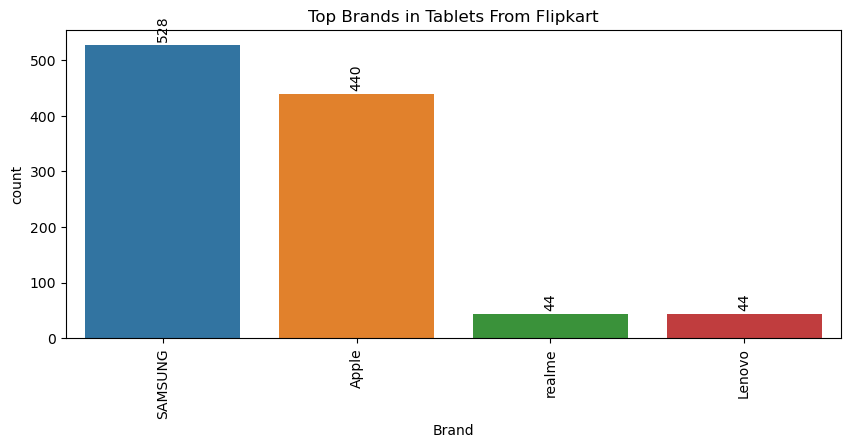

In [33]:
# Brands bar chart
plt.figure(figsize= (10,4))
plt.title("Top Brands in Tablets From Flipkart")
plt.xlabel("Brands")
plt.xticks(rotation=90)
ax=sns.countplot(x = df["Brand"])
ax.bar_label(ax.containers[0],padding =2,label_type = 'edge',rotation = 90)
plt.show()

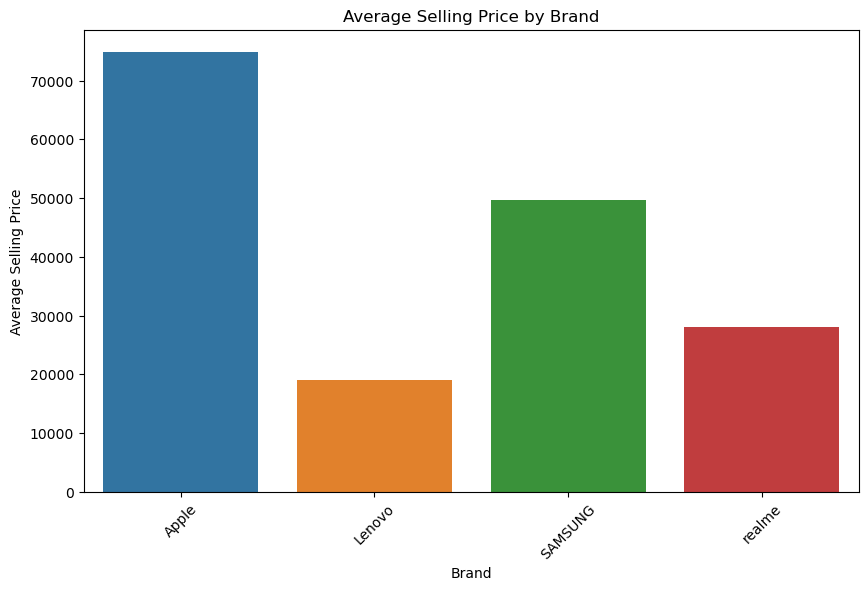

In [52]:
avg_price_by_brand = df.groupby('Brand')['Selling_price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Brand', y='Selling_price', data=avg_price_by_brand)
plt.title('Average Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

## Piechart

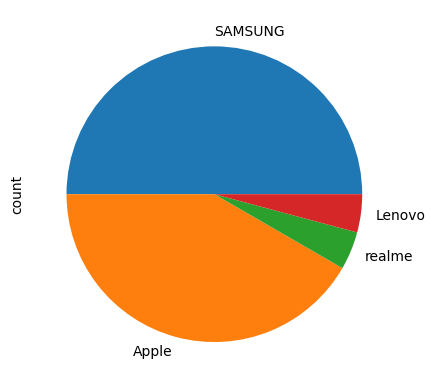

In [34]:
df['Brand'].value_counts().plot.pie()
plt.show()

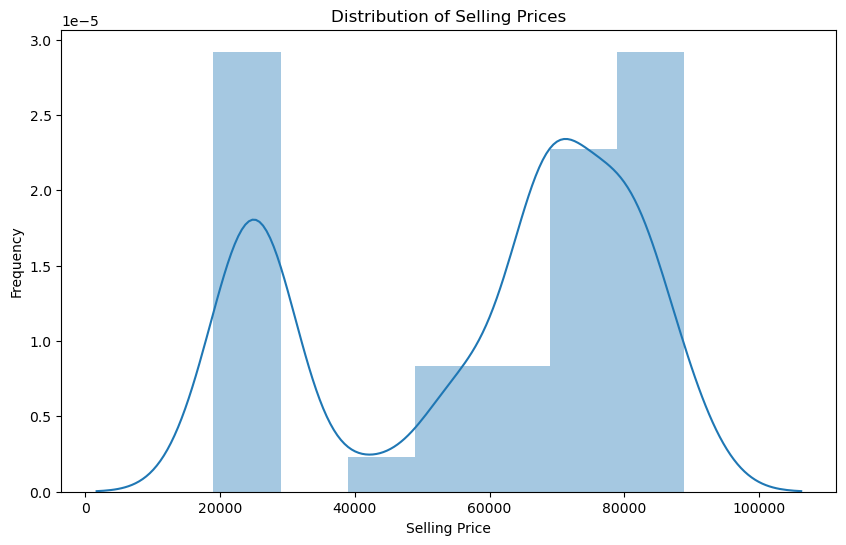

In [36]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [37]:
df.head()

,Brand,Color,Ram,Rom,Display,Battery,Primary_Camera,Front_Camera,Selling_price
0,SAMSUNG,Graphite,8.0,128,11.0,5100.000000,8.0,5,24999.0
1,SAMSUNG,Silver,8.0,128,11.0,5100.000000,8.0,5,24999.0
2,SAMSUNG,Navy,8.0,128,11.0,5100.000000,8.0,5,24999.0
3,Apple,Blue,12.0,256,10.9,7891.428571,12.0,12,79900.0
4,Apple,Space Grey,12.0,256,10.9,7891.428571,12.0,12,79900.0


## Groupby

In [38]:
df.groupby(by = 'Brand')[['Ram','Rom','Display']].mean()

,Ram,Rom,Display
Brand,,,
Apple,12.000000,160.000000,10.900000
Lenovo,4.000000,128.000000,10.610000
SAMSUNG,8.060606,143.515152,11.631818
realme,6.000000,128.000000,11.000000


In [39]:
df.groupby(by = ['Ram','Rom'])['Brand'].max()

Ram   Rom
4.0   64     SAMSUNG
      128     Lenovo
6.0   128     realme
8.0   128    SAMSUNG
12.0  64       Apple
      256    SAMSUNG
Name: Brand, dtype: object

## Crosstab

In [40]:
pd.crosstab(df['Brand'], df['Color'])

Color,Abyss Blue,Beige,Blue,GRAY,Glacier Blue,Graphite,Gray,Mint,Navy,Pink,Pink Gold,Purple,Silver,Space Grey,Star Light,space Grey
Brand,,,,,,,,,,,,,,,,
Apple,0,0,88,0,0,0,0,0,0,88,0,88,0,44,88,44
Lenovo,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SAMSUNG,0,20,0,44,0,44,132,44,88,0,44,0,112,0,0,0
realme,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0


## Pivot Table

In [41]:
df.pivot_table(values = 'Selling_price', index = 'Brand', aggfunc = 'mean')

,Selling_price
Brand,
Apple,74900.000000
Lenovo,18999.000000
SAMSUNG,49633.356061
realme,27999.000000


In [42]:
df.pivot_table(values = 'Selling_price', index = 'Brand', aggfunc = 'count')

,Selling_price
Brand,
Apple,440
Lenovo,44
SAMSUNG,528
realme,44


# Bivariate

## Heatmap

<Axes: >

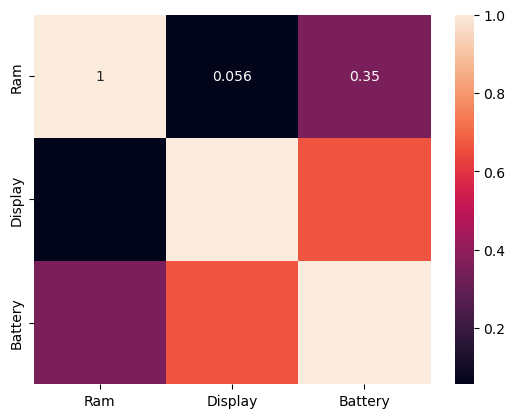

In [49]:
sns.heatmap(df[['Ram','Display','Battery']].corr(), annot = True)

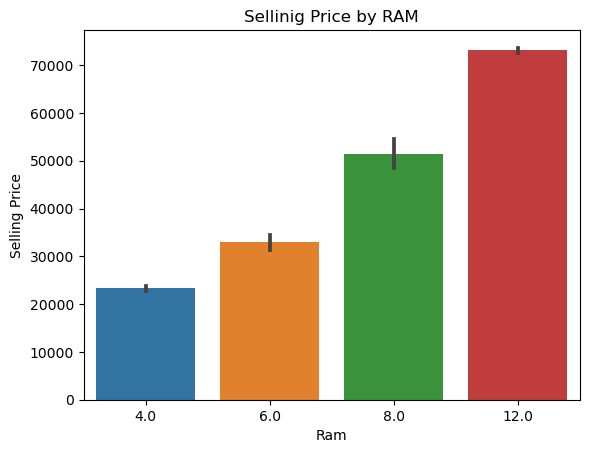

In [44]:
sns.barplot(x = 'Ram', y = 'Selling_price', data = df)
plt.title("Sellinig Price by RAM")
plt.xlabel('Ram')
plt.ylabel('Selling Price')
plt.show()

## Scatterplot

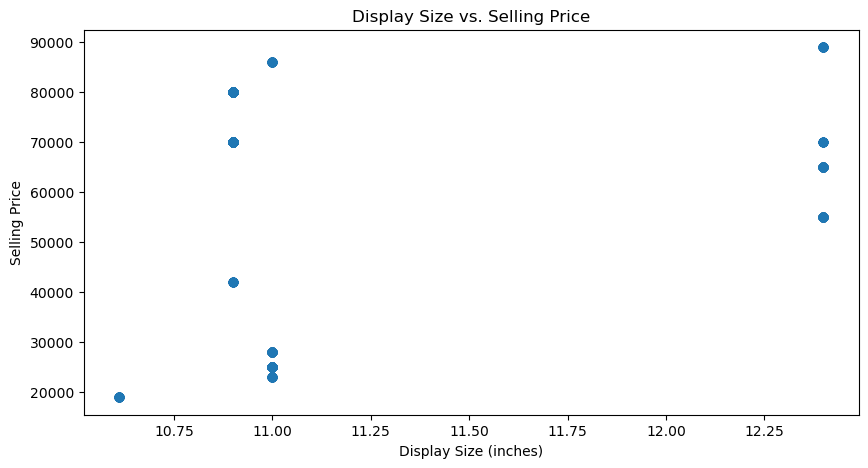

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Display'], df['Selling_price'])
plt.title('Display Size vs. Selling Price')
plt.xlabel('Display Size (inches)')
plt.ylabel('Selling Price')
plt.show()

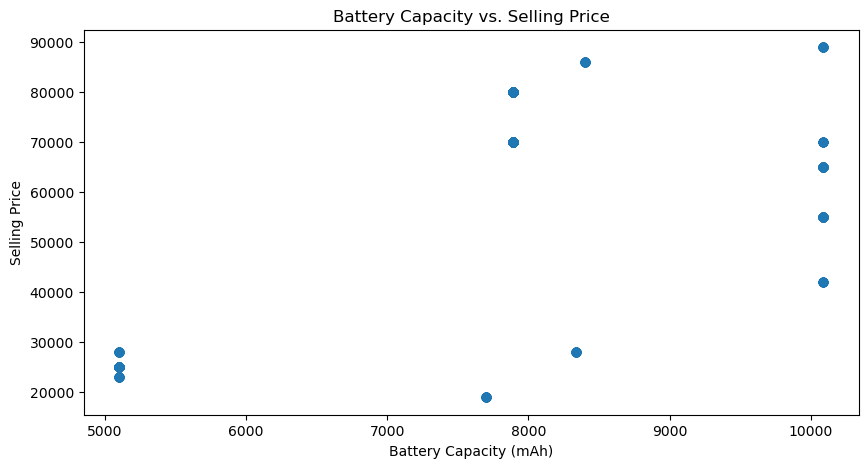

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(x='Battery', y='Selling_price', data=df)
plt.title('Battery Capacity vs. Selling Price')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Selling Price')
plt.show()

<Axes: xlabel='Battery', ylabel='Display'>

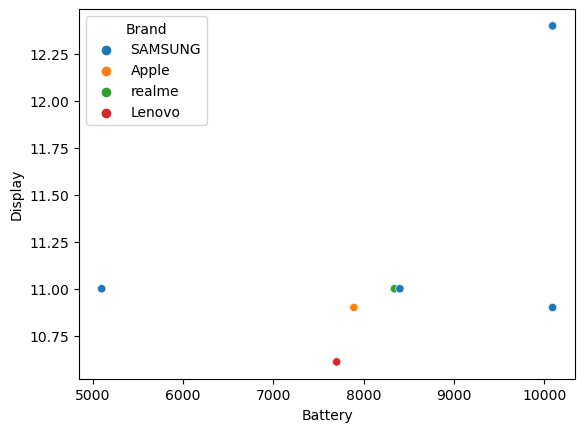

In [65]:
sns.scatterplot(x = df['Battery'],y = df['Display'], hue = df['Brand'])

## Line plot

<Axes: xlabel='Brand', ylabel='Selling_price'>

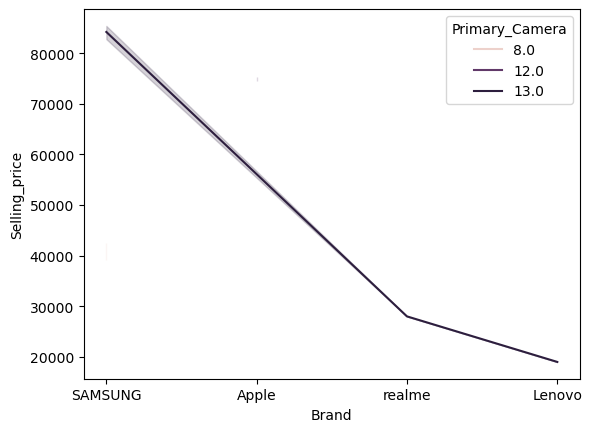

In [48]:
sns.lineplot(x = 'Brand', y= 'Selling_price', hue = 'Primary_Camera', data = df)

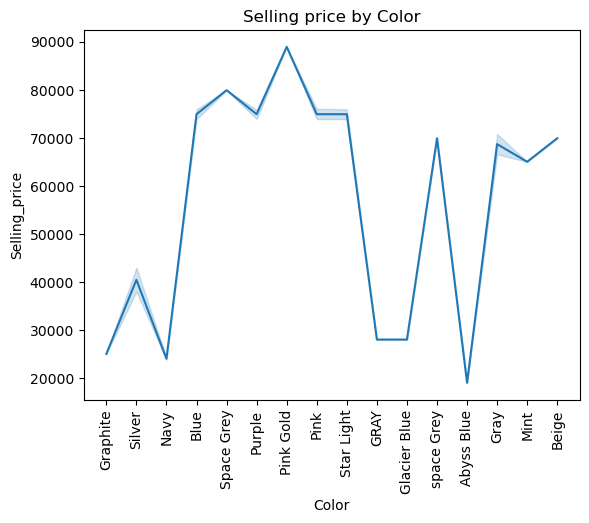

In [45]:
sns.lineplot(x = 'Color', y='Selling_price', data = df)
plt.title("Selling price by Color")
plt.xticks(rotation = 90)
plt.show()

## Box plot

<Axes: xlabel='Selling_price'>

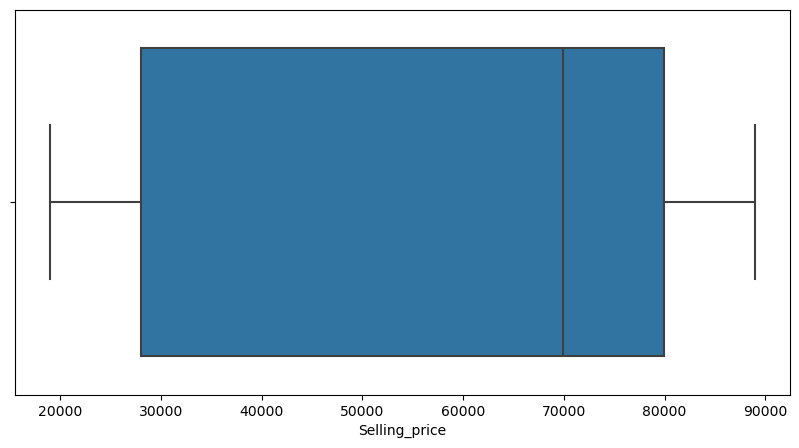

In [63]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df,x = 'Selling_price')

## Cat plot

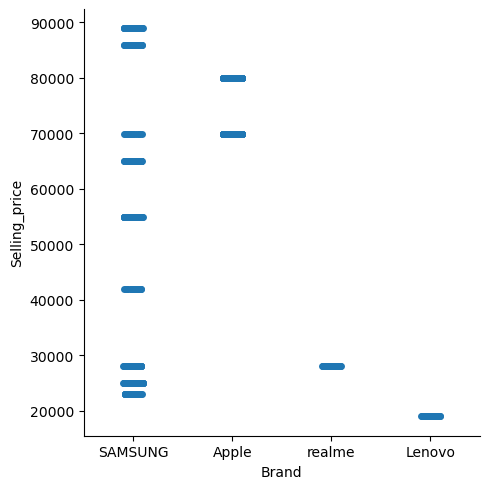

In [66]:
sns.catplot(x='Brand',y='Selling_price', data=df)

## Conslusion:


This project provides a comprehensive understanding of the factors influencing tablet prices on Flipkart.
The analysis not only benefits consumers in making informed purchase decisions but also aids sellers and manufacturers in 
optimizing their product features and pricing strategies. As the tablet market continues to evolve, ongoing analysis and 
adaptation will be crucial for maintaining competitiveness and meeting consumer expectations.